---
### <center> Carga de Datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carga y visualización de Datos:
df = pd.read_csv('datasets/potencia-instalada.csv')
df.head(5)

,id,periodo,central,agente,agente_descripcion,region,categoria_region,tipo_maquina,fuente_generacion,tecnologia,potencia_instalada_mw,fecha_proceso,lote_id_log,mes,indice_tiempo,anio
0,2,2015-10-01 00:00:00,ABRO,CTBROWNG,C.T. ALMIRANTE BROWN,GRAN BS.AS.,Gba - Litoral - Buenos Aires,DI,Térmica,Motor Diesel,25.00,2018-10-08 15:47:17.851306,4,10,2015-10,2015
1,3,2015-10-01 00:00:00,ACAJ,CAPEXSAG,C.T. AGUA DEL CAJON,COMAHUE,Comahue,TG,Térmica,Ciclos Combinados,184.40,2018-10-08 15:47:17.851306,4,10,2015-10,2015
2,4,2015-10-01 00:00:00,ADTOHI,HIDIAMAG,H. DIAMANTE SA,CUYO,Cuyo,HI,Hidráulica,Hidráulica,150.00,2018-10-08 15:47:17.851306,4,10,2015-10,2015
3,5,2015-10-01 00:00:00,AESP,CTAESPAG,C.T. AES PARANA,BUENOS AIRES,Gba - Litoral - Buenos Aires,TG,Térmica,Ciclos Combinados,525.96,2018-10-08 15:47:17.851306,4,10,2015-10,2015
4,6,2015-10-01 00:00:00,AESP,CTAESPAG,C.T. AES PARANA,BUENOS AIRES,Gba - Litoral - Buenos Aires,TV,Térmica,Ciclos Combinados,319.30,2018-10-08 15:47:17.851306,4,10,2015-10,2015


---
### <center> Preparación de Datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15793 entries, 0 to 15792
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     15793 non-null  int64  
 1   periodo                15793 non-null  object 
 2   central                15793 non-null  object 
 3   agente                 15789 non-null  object 
 4   agente_descripcion     15789 non-null  object 
 5   region                 15793 non-null  object 
 6   categoria_region       15793 non-null  object 
 7   tipo_maquina           15793 non-null  object 
 8   fuente_generacion      15793 non-null  object 
 9   tecnologia             15793 non-null  object 
 10  potencia_instalada_mw  15793 non-null  float64
 11  fecha_proceso          15793 non-null  object 
 12  lote_id_log            15793 non-null  int64  
 13  mes                    15793 non-null  int64  
 14  indice_tiempo          15793 non-null  object 
 15  an

In [4]:
# Chequeo de registros duplicados:
df.duplicated().value_counts()

False    15793
Name: count, dtype: int64

Observamos que el DataFrame posee 15792 registros, y que cada columna posee la misma cantidad de objetos no nulos (ni *'Nan'* ni *'None'*). Además, no existen registros duplicados.

In [5]:
# Información actualizada:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15793 entries, 0 to 15792
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     15793 non-null  int64  
 1   periodo                15793 non-null  object 
 2   central                15793 non-null  object 
 3   agente                 15789 non-null  object 
 4   agente_descripcion     15789 non-null  object 
 5   region                 15793 non-null  object 
 6   categoria_region       15793 non-null  object 
 7   tipo_maquina           15793 non-null  object 
 8   fuente_generacion      15793 non-null  object 
 9   tecnologia             15793 non-null  object 
 10  potencia_instalada_mw  15793 non-null  float64
 11  fecha_proceso          15793 non-null  object 
 12  lote_id_log            15793 non-null  int64  
 13  mes                    15793 non-null  int64  
 14  indice_tiempo          15793 non-null  object 
 15  an

In [6]:
 # Convierte la columna 'periodo' en datetime
df['periodo'] = pd.to_datetime(df['periodo']) 
#df.set_index('periodo', inplace=True)

El DataFrame consta de 15792 registros, sin inconsistencias, valores no nulos ni duplicados.

---
### <center> Análisis exploratorio de Datos

Al consultar las **'fuentes_generacion'**, observamos que existen varias clasificaciones para las tecnologías no renovables (Térmica, Hidráulica y Nuclear):

In [7]:
df['categoria_region'].value_counts()

categoria_region
Gba - Litoral - Buenos Aires    4786
Noa                             2740
Centro                          1880
Cuyo                            1809
Comahue                         1642
Nea                             1374
Patagonia                        958
Unidades Móviles                 604
Name: count, dtype: int64

In [8]:
df['fuente_generacion'].value_counts()

fuente_generacion
Térmica       11191
Renovable      3186
Hidráulica     1266
Nuclear         150
Name: count, dtype: int64

In [9]:
# Analizamos los Tipos de tecnología disponibles:
df['tecnologia'].value_counts()

tecnologia
Motor Diesel            5323
Turbina a gas           3197
Ciclos Combinados       2073
Hidráulica Renovable    1688
Hidráulica              1266
Eólica                   747
Turbovapor               599
Solar                    475
Biogas                   257
Nuclear                  150
Micro Hidráulica          10
Biomasa                    8
Name: count, dtype: int64

Estas Tecnologías se corresponden con las siguientes descripciones:

**No Renovables:**
* Motor Diesel
* Turbina a Gas
* Ciclos Combinados
* Hidráulica
* Turbovapor
* Nuclear


**Renovables:**
* Turbo Vapor
* Eólica
* Solar
* Biomasa
* Biogas
* Microhidráulica
* Hidráulica Renovable

In [10]:
# Corroboramos esta clasificación, consultando aquellas consideradas 'Renovables':
df[df['fuente_generacion'] == "Renovable"]['tecnologia'].value_counts()

tecnologia
Hidráulica Renovable    1688
Eólica                   747
Solar                    475
Biogas                   257
Micro Hidráulica          10
Biomasa                    8
Turbovapor                 1
Name: count, dtype: int64

In [11]:
df[df['fuente_generacion'] != "Renovable"]['tecnologia'].value_counts()

tecnologia
Motor Diesel         5323
Turbina a gas        3197
Ciclos Combinados    2073
Hidráulica           1266
Turbovapor            598
Nuclear               150
Name: count, dtype: int64

Como la columna **'fuente_generacion'** posee varias clasificaciones según el origen de las fuentes no renovables, agrupamos estas clasificaciones y agregamos una columna **'renovable'** con valores booleanos que indique claramente si la producción es renovable o no:

In [12]:
# Agrupa los datos por año y suma la columna 'potencia_instalada_mw' si es 'renovable' o 'no renovable'
pot_renov = df[df['fuente_generacion'] == 'Renovable'].groupby('anio')['potencia_instalada_mw'].sum()
pot_no_renov = df[df['fuente_generacion'] != 'Renovable'].groupby('anio')['potencia_instalada_mw'].sum()

anios=[2015,2016,2017,2018,2019,2020]

# Agrupa los datos totales por año y suma la columna 'potencia_instalada_mw' 
potencia_MWh = df.groupby(df['anio'])['potencia_instalada_mw'].sum()
anual_potencia_MWh = df['potencia_instalada_mw'].sum()

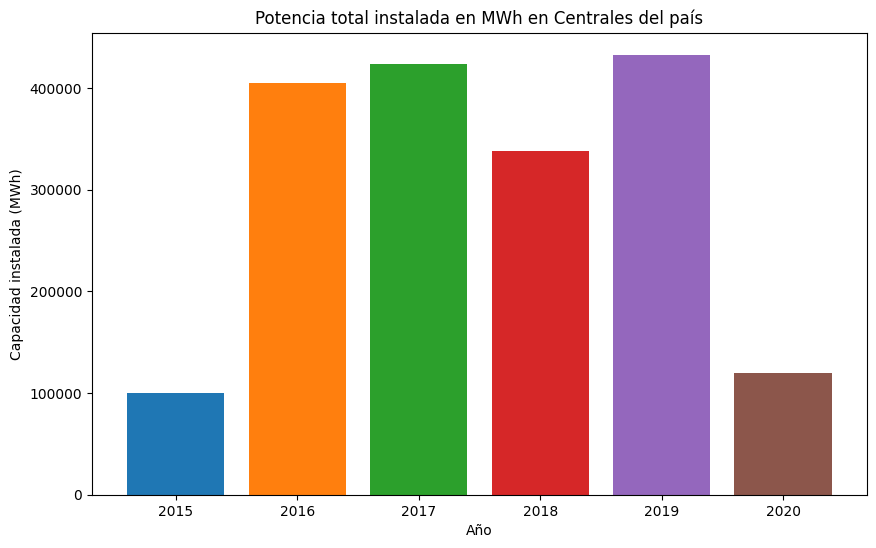

In [13]:
potencia_MWh = df.groupby('anio')['potencia_instalada_mw'].sum().reset_index()

# Gráfico de Potencia Total instalada en centrales del país por año

plt.figure(figsize=(10, 6))
palette = sns.color_palette() 
plt.bar(potencia_MWh['anio'], potencia_MWh['potencia_instalada_mw'], color=palette)
plt.xlabel('Año')
plt.ylabel('Capacidad instalada (MWh)')
plt.title('Potencia total instalada en MWh en Centrales del país')

plt.show()

<Figure size 1000x800 with 0 Axes>

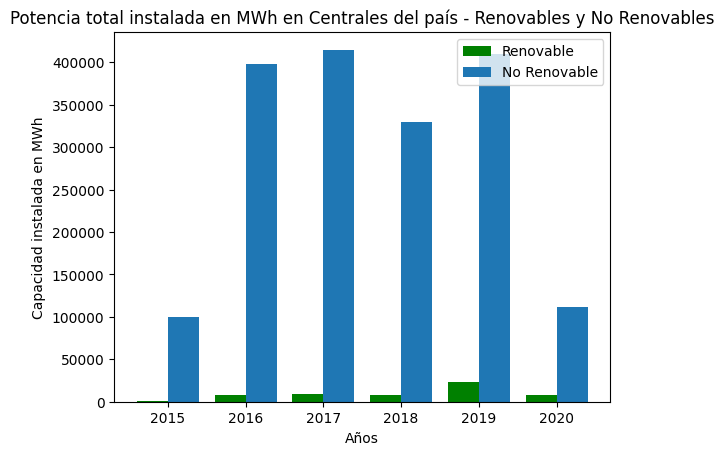

In [14]:
# Gráfico de potencia instalada en centrales del país separadas en 'renovables' y 'no renovables'
co = np.arange(len(anios))
an = 0.40
plt.figure(figsize=(10, 8))
fig, ax = plt.subplots()
ax.bar(co - an/2, pot_renov, an, label= 'Renovable', color = 'green')
ax.bar(co + an/2, pot_no_renov, an, label= 'No Renovable')

ax.set_title('Potencia total instalada en MWh en Centrales del país - Renovables y No Renovables')
ax.set_xlabel('Años')
ax.set_ylabel('Capacidad instalada en MWh')
ax.set_xticks(co)
ax.set_xticklabels(anios)

plt.legend()
plt.show()

In [15]:
# DataFrame con los datos de energía renovable
energia_renovable = df[df['fuente_generacion'] == "Renovable"]
# Calculo la suma de la potencia instalada de energía renovable
potencia_renovable_total = energia_renovable['potencia_instalada_mw'].sum()

# Calculo la suma de la potencia total instalada
potencia_total = df['potencia_instalada_mw'].sum()

# Porcentaje de potencia instalada de energía renovable sobre el total
porcentaje_renovable = (potencia_renovable_total / potencia_total) * 100
porcentaje_no_renovable = 100 - porcentaje_renovable


In [16]:
# Separa datos de prueba y de entrenamiento
#X = df.drop('potencia_instalada_mw', axis=1)
#y = data['potencia_instalada_mw']
#X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)